# Kinetic model for TEOS hydrolysis

This is a theroetical study of the hydrolysis of tetraethoxysilan in basic condition to form nanoparticles. 
The formation of those nanoparticles is followed by light scattering, red curve in the graph. 

## Notation:
* $TEOS = Si(OEt)_4$
* $M = (EtO)_3SiO^-$
* $B =(EtO)_2SiO^{2-}$

## Chemistry:

$$ TEOS + OH^- \longrightarrow \underrightarrow{k_1}\longrightarrow M + EtOH $$

$$ M + OH^- \longrightarrow \underrightarrow{k_2}\longrightarrow B + EtOH$$

## Kinetics:
$$\frac{\partial [OH]}{\partial t} = -k_1[OH]\cdot[TEOS]-k_2[OH]\cdot[M] $$
$$\frac{\partial [M]}{\partial t} = k1[OH]\cdot[TEOS]-k_2[OH]\cdot[M]$$

with:
$k_1 = 5.10^{-2} L.mol^{-1}.s^{-1}$ and $K = \frac{k_2}{k_1}$.

Try with K = 0.1, 0.3,… 1, ….10 to see if it can more or less fit the data (abrupt change of slope).


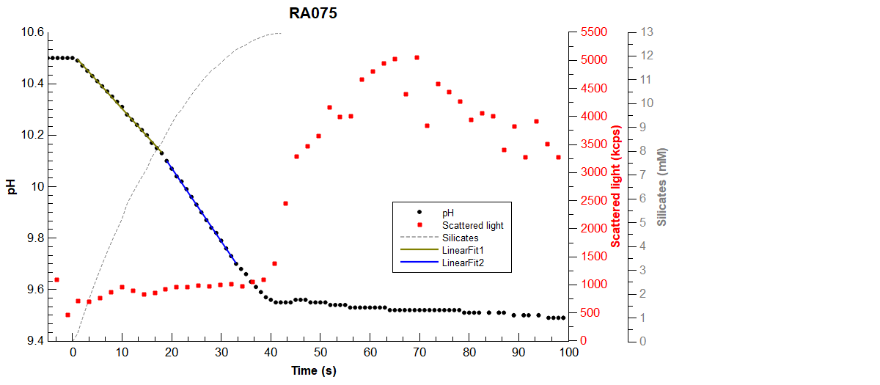

In [1]:
# define some constants for the calculations:
k1 = 1
K = 10

#Initial conditions:
OH0 = 0.0148
TEOS0 = 48e-3 #mol/L
t_max = 100 # Simulation time in seconds
dt = 1e-3 #s time step

In [2]:
#Immediately derived:
k2 = K*k1
#OH0 = 10.0**-(14-pH0) # [OH-] at start time
dpH0 = 0
N = int(t_max/dt) #number of time-stamps
print(f"Number of time-steps: {N}")

Number of time-steps: 100000


In [3]:
# Prepare some arrays:
dpH = [None] * N
time = [i*dt for i in range(N)]

In [4]:
dpH[0] = dpH0
OH = OH0
M = 0.0
B = 0.0
TEOS = TEOS0
from math import log10

for i in range(1, N):
    #quantity of matter transformed in `dt` for equations 1 and 2
    R1 = k1 * TEOS * OH * dt
    R2 = k2 * M * OH * dt
   
    #Update concentations:
    TEOS -= R1
    OH -= R1 + R2 
    M += R1 - R2
    B += R2
    
    # Record pH
    dpH[i] = log10(OH)-log10(OH0)


In [5]:
%matplotlib widget
from matplotlib.pyplot import subplots

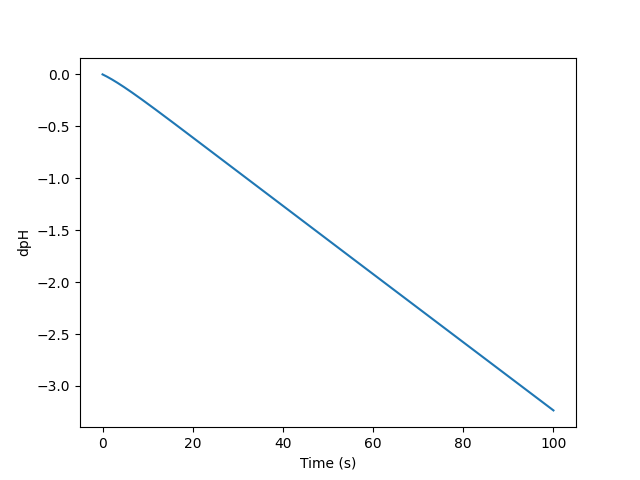

In [6]:
fig,ax = subplots()
ax.plot(time, dpH)
ax.set_xlabel("Time (s)")
ax.set_ylabel("dpH")
pass

In [7]:
with open("results.txt", "w") as f:
    f.write("#time    dpH\n")
    for x,y in zip(time, dpH):
        f.write(f"{x:5.3f}    {y:7.5f}\n")

In [8]:
print(f"Concentrations à t={t_max}s: [OH-]= {OH:e} mol/L; [TEOS]= {TEOS:e} mol/L; [M]= {M:e} mol/L; [B]= {B:e} mol/L")

Concentrations à t=100s: [OH-]= 8.613802e-06 mol/L; [TEOS]= 3.876542e-02 mol/L; [M]= 3.677765e-03 mol/L; [B]= 5.556811e-03 mol/L


In [9]:
TEOS+M

0.042443189179803005

In [10]:
M+OH

0.0036863783596085475